In [2]:
import os
import cv2

In [3]:
path="Traffic sign/mydata"

In [4]:
features=[]

In [5]:
target=[]

In [6]:
mylist=os.listdir("Traffic sign/mydata")

In [7]:
print("Importing images")
for folder in mylist:
    mypiclist=os.listdir(path + "/" + folder)
    for i in mypiclist:
        image=cv2.imread(path + "/" + folder + "/" + i)
        features.append(image)
        target.append(int(folder))
    print(folder)

Importing images
0
1
10
11
12
13
14
15
16
17
18
19
2
20
21
22
23
24
25
26
27
28
29
3
30
31
32
33
34
35
36
37
38
39
4
40
41
42
5
6
7
8
9


In [56]:
import numpy as np

# Convert source image to unsigned 8 bit integer Numpy array
features=np.uint8(features)
target=np.uint8(target)

In [57]:
import numpy as np

In [58]:
features.shape

(34799, 32, 32, 3)

In [59]:
target.shape

(34799,)

In [60]:
features=np.array(features)
target=np.array(target)

In [61]:
type(features)

numpy.ndarray

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
train_features,test_features,train_traget,test_target=train_test_split(features,target,test_size=0.2)

In [64]:
train_features.shape

(27839, 32, 32, 3)

In [65]:
test_features.shape

(6960, 32, 32, 3)

In [66]:
def grayscale(img):
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def preprocessing(img):
    img=grayscale(img)
    img=img/255
    return img

In [67]:
train_features=np.array(list(map(preprocessing,train_features)))
test_features=np.array(list(map(preprocessing,test_features)))

In [68]:
train_features=train_features.reshape(27839, 32, 32,1)
test_features=test_features.reshape(6960,32,32,1)

In [69]:
from keras.utils.np_utils import to_categorical

In [70]:
train_traget=to_categorical(train_traget,43)

In [71]:
test_traget=to_categorical(test_target,43)

In [72]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [73]:
datagen=ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.3,shear_range=0.2,rotation_range=45)

In [74]:
datagen.fit(train_features)

In [75]:
batches=datagen.flow(train_features,train_traget,batch_size=20)
X_batch,Y_batch=next(batches)

In [76]:
import matplotlib.pyplot as plt 

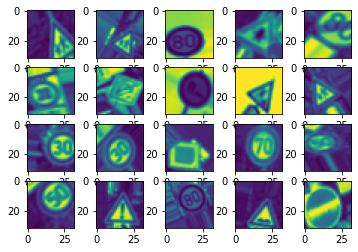

In [77]:
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_batch[i].reshape(32,32))
plt.show()

In [78]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [79]:
model=Sequential()

In [80]:
model.add(Conv2D(60,(2,2),input_shape=(32,32,1),activation="relu"))
model.add(Conv2D(60,(2,2),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(30,(2,2),activation="relu"))
model.add(Conv2D(30,(2,2),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(300,activation="relu"))
model.add(Dense(43,activation="softmax"))

In [81]:
from keras.optimizers import Adam

In [82]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

D:\Anaconda\envs\notebook\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [83]:
model.fit_generator(datagen.flow(train_features,train_traget,batch_size=20),epochs=10)

D:\Anaconda\envs\notebook\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
 282/1392 [=====>........................] - ETA: 1:00 - loss: 3.5241 - accuracy: 0.0628

KeyboardInterrupt: 

In [30]:
import numpy as np
import cv2

def getClassName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'

In [31]:
cap=cv2.VideoCapture(0)

In [32]:
while True:
    message,imgOriginal=cap.read()
    img=np.array(imgOriginal)
    img=cv2.resize(img, (32,32))
    img=preprocessing(img)
    img=img.reshape(1 ,32 ,32 ,1)
    cv2.putText(imgOriginal,"Class",(20,35),cv2.FONT_HERSHEY_TRIPLEX,1,(23,120,255),2)
    cv2.putText(imgOriginal,"Probability",(20,75),cv2.FONT_HERSHEY_TRIPLEX,1,(23,120,255),2)
    probabilities=model.predict(img)
    classIndex=model.predict_classes(img)
    maxprob=np.amax(probabilities)
    if maxprob>0.75:
        cv2.putText(imgOriginal,getClassName(classIndex),(120,35),cv2.FONT_HERSHEY_TRIPLEX,1,(23,120,255),2)
        cv2.putText(imgOriginal,str(maxprob) + "%",(120,75),cv2.FONT_HERSHEY_TRIPLEX,1,(23,120,255),2)
    cv2.imshow("Result",imgOriginal)
    if cv2.waitKey(1) & 0xFF==ord("q"):
        break

D:\anaconda\envs\notebook\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
